# Checking and playing with NICER data
Looking through and plotting segment information

In [1]:
import numpy as np
from astropy.table import Table, Column, unique
import os
# import subprocess
from astropy.io import fits
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter, NullFormatter
import matplotlib.gridspec as gridspec
from matplotlib.colors import cnames as mcolors
from matplotlib._color_data import XKCD_COLORS as xkcdcolor
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
font_prop = font_manager.FontProperties(size=20)
%matplotlib inline

In [4]:
homedir = os.path.expanduser("~")
exe_dir = homedir + "/Dropbox/Research/MAXIJ1535_QPO"

In [5]:
## This seg_info_file was made in analyze_all_segments.py
seg_info_file = exe_dir+"/out/MAXIJ1535_seg-info.dat"
seg_tab = Table.read(seg_info_file, format='ascii', 
                     names=('obsID', 'start_time', 'end_time', 
                            'total_rate', 'broad_rate', 'rms', 
                            'hard_rate', 'soft_rate', 'hr', 
                            'nz_rate', 'ibg_rate', 'hrej_rate'))
sept1 = 115689602  # seconds since 2014-01-01T00:00:00 UTC including 2 leap seconds
seg_tab['sept_days'] = seg_tab['start_time'] - sept1
seg_tab['sept_days'] /= (60*60*24)  # now it's in days since Sept 1 00:00:00 UTC

In [6]:
## This is the last bin of the early evtlists. 
## There was then a couple-month gap when NICER couldn't observe the source, 
## after which it was very faint and in the soft state.
# print(np.where(seg_tab['sept_days'] > 50)[0][0])
# print(seg_tab['sept_days'][1752], seg_tab['obsID'][1752])
# print(seg_tab['sept_days'][1753], seg_tab['obsID'][1753])

In [7]:
## Only keeping the useful data from the first long chunk of observations (through mid-October-ish)
hr_outlier_mask = seg_tab['hr'] < 0.072
plot_tab = seg_tab[hr_outlier_mask]
print(seg_tab[~hr_outlier_mask])
soft_segs_mask = (plot_tab['rms'] < 0.05) & (plot_tab['hr'] <= 0.031) & (plot_tab['hr'] >= 0.021) & (plot_tab['broad_rate'] > 5000)
soft_segs = plot_tab[soft_segs_mask]
hard_segs_mask = (plot_tab['rms'] < 0.05) & (plot_tab['hr'] >= 0.031) & (plot_tab['hr'] <= 0.050)
hard_segs = plot_tab[hard_segs_mask]
low_segs_mask = (plot_tab['rms'] < 0.05) & (plot_tab['hr'] <= 0.031) & (plot_tab['hr'] >= 0.021) & \
                (plot_tab['broad_rate'] < 5000)
low_segs = plot_tab[low_segs_mask]
print(len(soft_segs))

  obsID        start_time     ... hrej_rate     sept_days     
---------- ------------------ ... --------- ------------------
1050360108        117008013.0 ...  0.203125 15.259386574074075
1050360109 117091448.00016183 ...    0.1875 16.225069446317438
1050360109 117091512.00016183 ...   0.15625  16.22581018705818
428


/anaconda3/envs/maxij1535/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


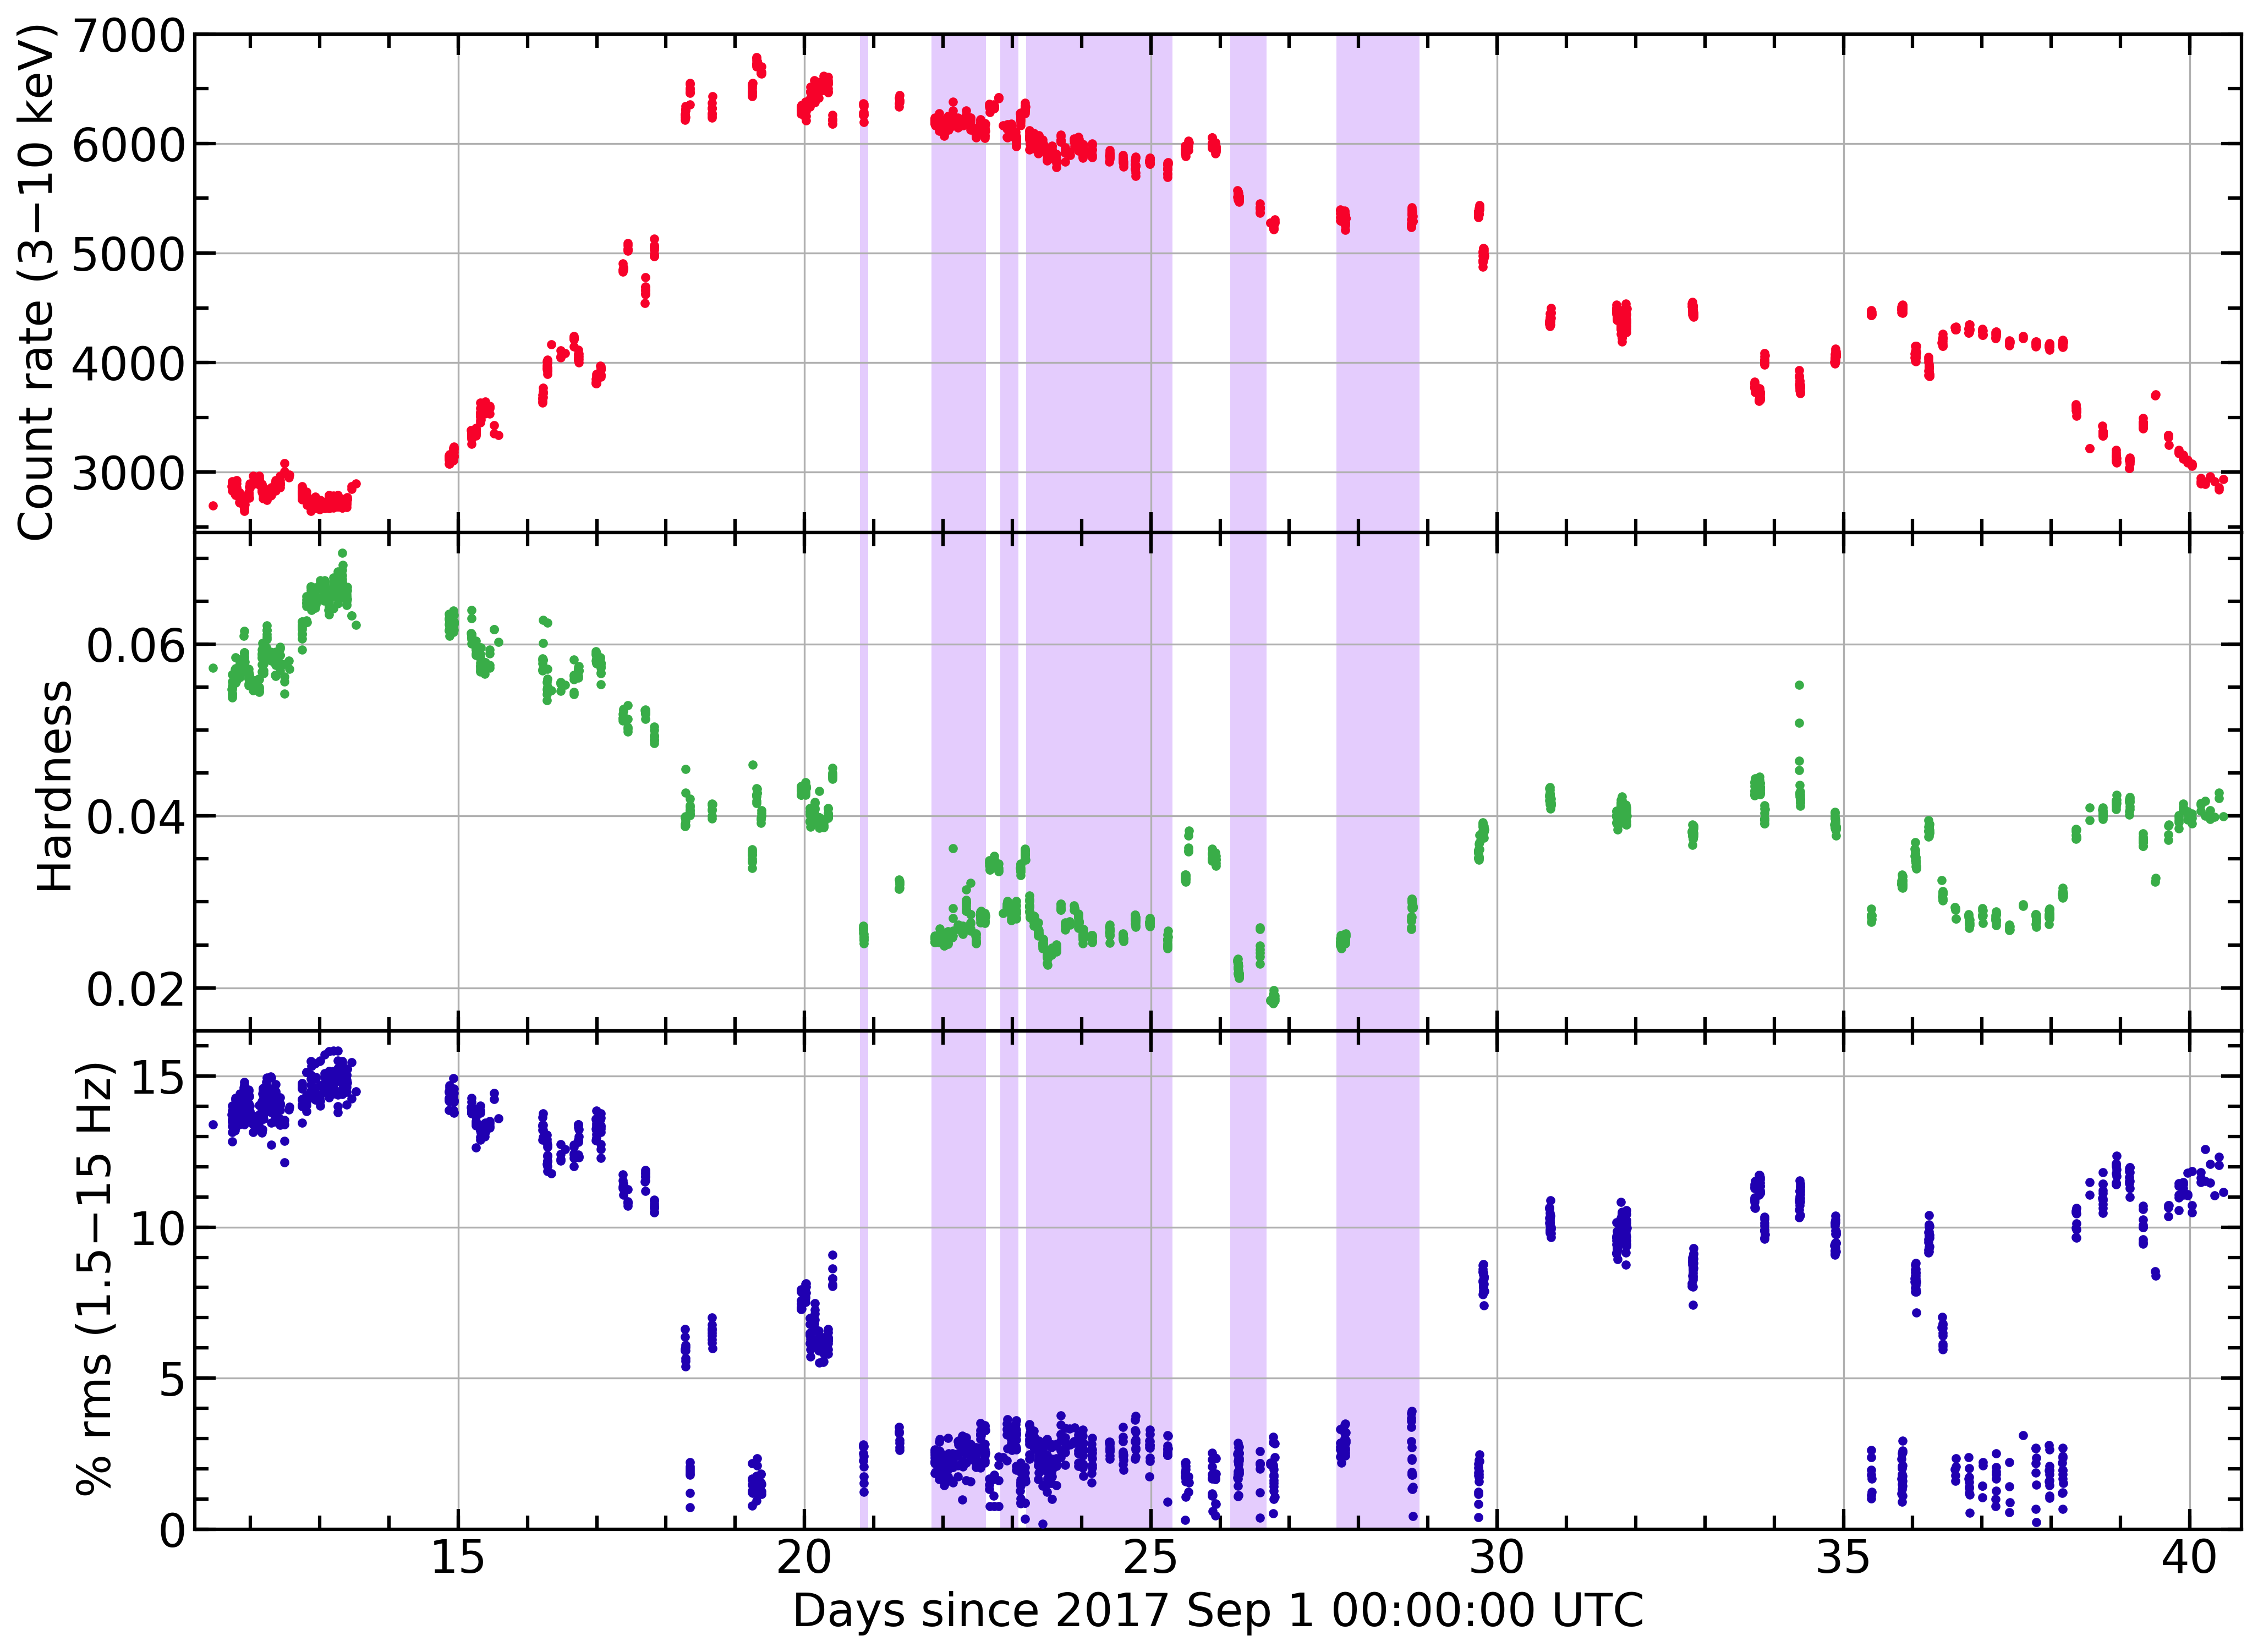

In [23]:
fig = plt.figure(figsize=(16, 12), dpi=300, tight_layout=True)
gs1 = gridspec.GridSpec(3, 1)
gs1.update(wspace=0.025, hspace=0.0)

ax1 = plt.subplot(gs1[0])
rec1 = patches.Rectangle((20.80,2450),0.12, 4550, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax1.add_patch(rec1)
rec2 = patches.Rectangle((21.83,2450),0.79, 4550, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax1.add_patch(rec2)
rec3 = patches.Rectangle((22.83,2450),0.26, 4550, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax1.add_patch(rec3)
rec4 = patches.Rectangle((23.2,2450),2.11, 4550, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax1.add_patch(rec4)
rec5 = patches.Rectangle((26.15,2450),0.52, 4550, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax1.add_patch(rec5)
rec6 = patches.Rectangle((27.68,2450),1.2, 4550, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax1.add_patch(rec6)
# rec6 = patches.Rectangle((35.34,2450),0.12, 4550, edgecolor=None, 
#                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
# ax1.add_patch(rec6)
# rec7 = patches.Rectangle((36.55,2450),1.72, 4550, edgecolor=None, 
#                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
# ax1.add_patch(rec7)
ax1.scatter(plot_tab['sept_days'], plot_tab['broad_rate'], marker='.', 
            color=xkcdcolor['xkcd:cherry red'], zorder=10)
ax1.set_ylabel("Count rate (3$-$10 keV)", fontproperties=font_prop)
ax1.set_xlim(11.2,40.75)
ax1.set_ylim(2450,7000)
# ax1.set_ylim(0.00, 0.17)
ax1.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax1.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax1.tick_params(which='major', width=1.5, length=9, direction="in")
ax1.tick_params(which='minor', width=1.5, length=6, direction="in")
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_minor_locator(MultipleLocator(500))
ax1.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_zorder(9)
ax1.xaxis.grid(True, which='major')
ax1.yaxis.grid(True, which='major')
ax1.set_axisbelow(False)

ax2 = plt.subplot(gs1[1], sharex=ax1)
rec1 = patches.Rectangle((20.80,0.015),0.12, 0.078, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax2.add_patch(rec1)
rec2 = patches.Rectangle((21.83,0.015),0.79, 0.078, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax2.add_patch(rec2)
rec3 = patches.Rectangle((22.83,0.015),0.26, 0.078, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax2.add_patch(rec3)
rec4 = patches.Rectangle((23.2,0.015),2.11, 0.078, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax2.add_patch(rec4)
rec5 = patches.Rectangle((26.15,0.015),0.52, 0.078, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax2.add_patch(rec5)
rec6 = patches.Rectangle((27.68,0.015),1.2, 0.078, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax2.add_patch(rec6)
# rec6 = patches.Rectangle((35.34,0.015),0.12, 0.078, edgecolor=None, 
#                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
# ax2.add_patch(rec6)
# rec7 = patches.Rectangle((36.55,0.015),1.72, 0.078, edgecolor=None, 
#                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
# ax2.add_patch(rec7)
ax2.scatter(plot_tab['sept_days'], plot_tab['hr'], marker='.', 
            color=xkcdcolor['xkcd:medium green'], zorder=10)
ax2.set_ylabel("Hardness", fontproperties=font_prop)
ax1.set_xlim(11.2,40.75)
ax2.set_ylim(0.015, 0.073)
ax2.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in", zorder=6)
ax2.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in", zorder=5)
ax2.tick_params(which='major', width=1.5, length=9, direction="in", zorder=8)
ax2.tick_params(which='minor', width=1.5, length=6, direction="in", zorder=7)
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_minor_locator(MultipleLocator(0.005))
ax2.yaxis.set_ticks_position('both')
# ax2.xticks.set_zorder(8)
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_zorder(9)
ax2.xaxis.grid(True, which='major', zorder=4)
ax2.yaxis.grid(True, which='major', zorder=5)
ax2.set_axisbelow(False)

ax3 = plt.subplot(gs1[2], sharex=ax1)
# for time in unique(soft_segs, keys='sept_days')['sept_days']:
#     ax3.vlines(time, 0.00, 0.165, lw=3, color=xkcdcolor['xkcd:lilac'], alpha=0.3, zorder=3)
rec1 = patches.Rectangle((20.80,0.0),0.12, 16.5, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax3.add_patch(rec1)
rec2 = patches.Rectangle((21.83,0.0),0.79, 16.5, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax3.add_patch(rec2)
rec3 = patches.Rectangle((22.83,0.0),0.26, 16.5, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax3.add_patch(rec3)
rec4 = patches.Rectangle((23.2,0.0),2.11, 16.5, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax3.add_patch(rec4)
rec5 = patches.Rectangle((26.15,0.0),0.52, 16.5, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax3.add_patch(rec5)
rec6 = patches.Rectangle((27.68,0.0),1.2, 16.5, edgecolor=None, 
                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
ax3.add_patch(rec6)
# rec6 = patches.Rectangle((35.34,0.0),0.12, 16.5, edgecolor=None, 
#                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
# ax3.add_patch(rec6)
# rec7 = patches.Rectangle((36.55,0.0),1.72, 16.5, edgecolor=None, 
#                         facecolor=xkcdcolor['xkcd:lilac'], alpha=0.55)
# ax3.add_patch(rec7)
ax3.scatter(plot_tab['sept_days'], plot_tab['rms']*100, marker='.', 
            color=xkcdcolor['xkcd:ultramarine'], zorder=10)
ax3.set_xlabel("Days since 2017 Sep 1 00:00:00 UTC", fontproperties=font_prop)
ax3.set_ylabel("% rms (1.5$-$15 Hz)", fontproperties=font_prop)
ax1.set_xlim(11.2,40.75)
ax3.set_ylim(0., 16.5)
ax3.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax3.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax3.tick_params(which='major', width=1.5, length=9, direction="in")
ax3.tick_params(which='minor', width=1.5, length=6, direction="in")
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.xaxis.set_minor_formatter(NullFormatter())
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_minor_locator(MultipleLocator(1))
ax3.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(1.5)
    ax3.spines[axis].set_zorder(9)
ax3.xaxis.grid(True, which='major')
ax3.yaxis.grid(True, which='major')
ax3.set_axisbelow(False)
plt.savefig("./out/outburst_lightcurves.pdf")
plt.show()

In [12]:
first_window = (seg_tab['sept_days'] >= 20) & (seg_tab['sept_days'] < 23)
print(unique(seg_tab[first_window], keys='obsID')['obsID'])
second_window = (seg_tab['sept_days'] >= 23) & (seg_tab['sept_days'] < 26)
print(unique(seg_tab[second_window], keys='obsID')['obsID'])
third_window = (seg_tab['sept_days'] >= 26) & (seg_tab['sept_days'] < 30)
print(unique(seg_tab[third_window], keys='obsID')['obsID'])
fourth_window = (seg_tab['sept_days'] >= 35) & (seg_tab['sept_days'] < 39)
print(unique(seg_tab[fourth_window], keys='obsID')['obsID'])

  obsID   
----------
1050360113
1050360114
1050360115
  obsID   
----------
1050360116
1050360117
1050360118
1050360120
  obsID   
----------
1050360119
1130360101
1130360102
1130360103
  obsID   
----------
1130360109
1130360110
1130360111
1130360112


In [13]:
gray_mask = (plot_tab['rms'] >= 0.05) | ((plot_tab['rms'] < 0.05) & ((plot_tab['hr'] < 0.021) | (plot_tab['broad_rate'] < 5000)))
gray_tab = plot_tab[gray_mask]

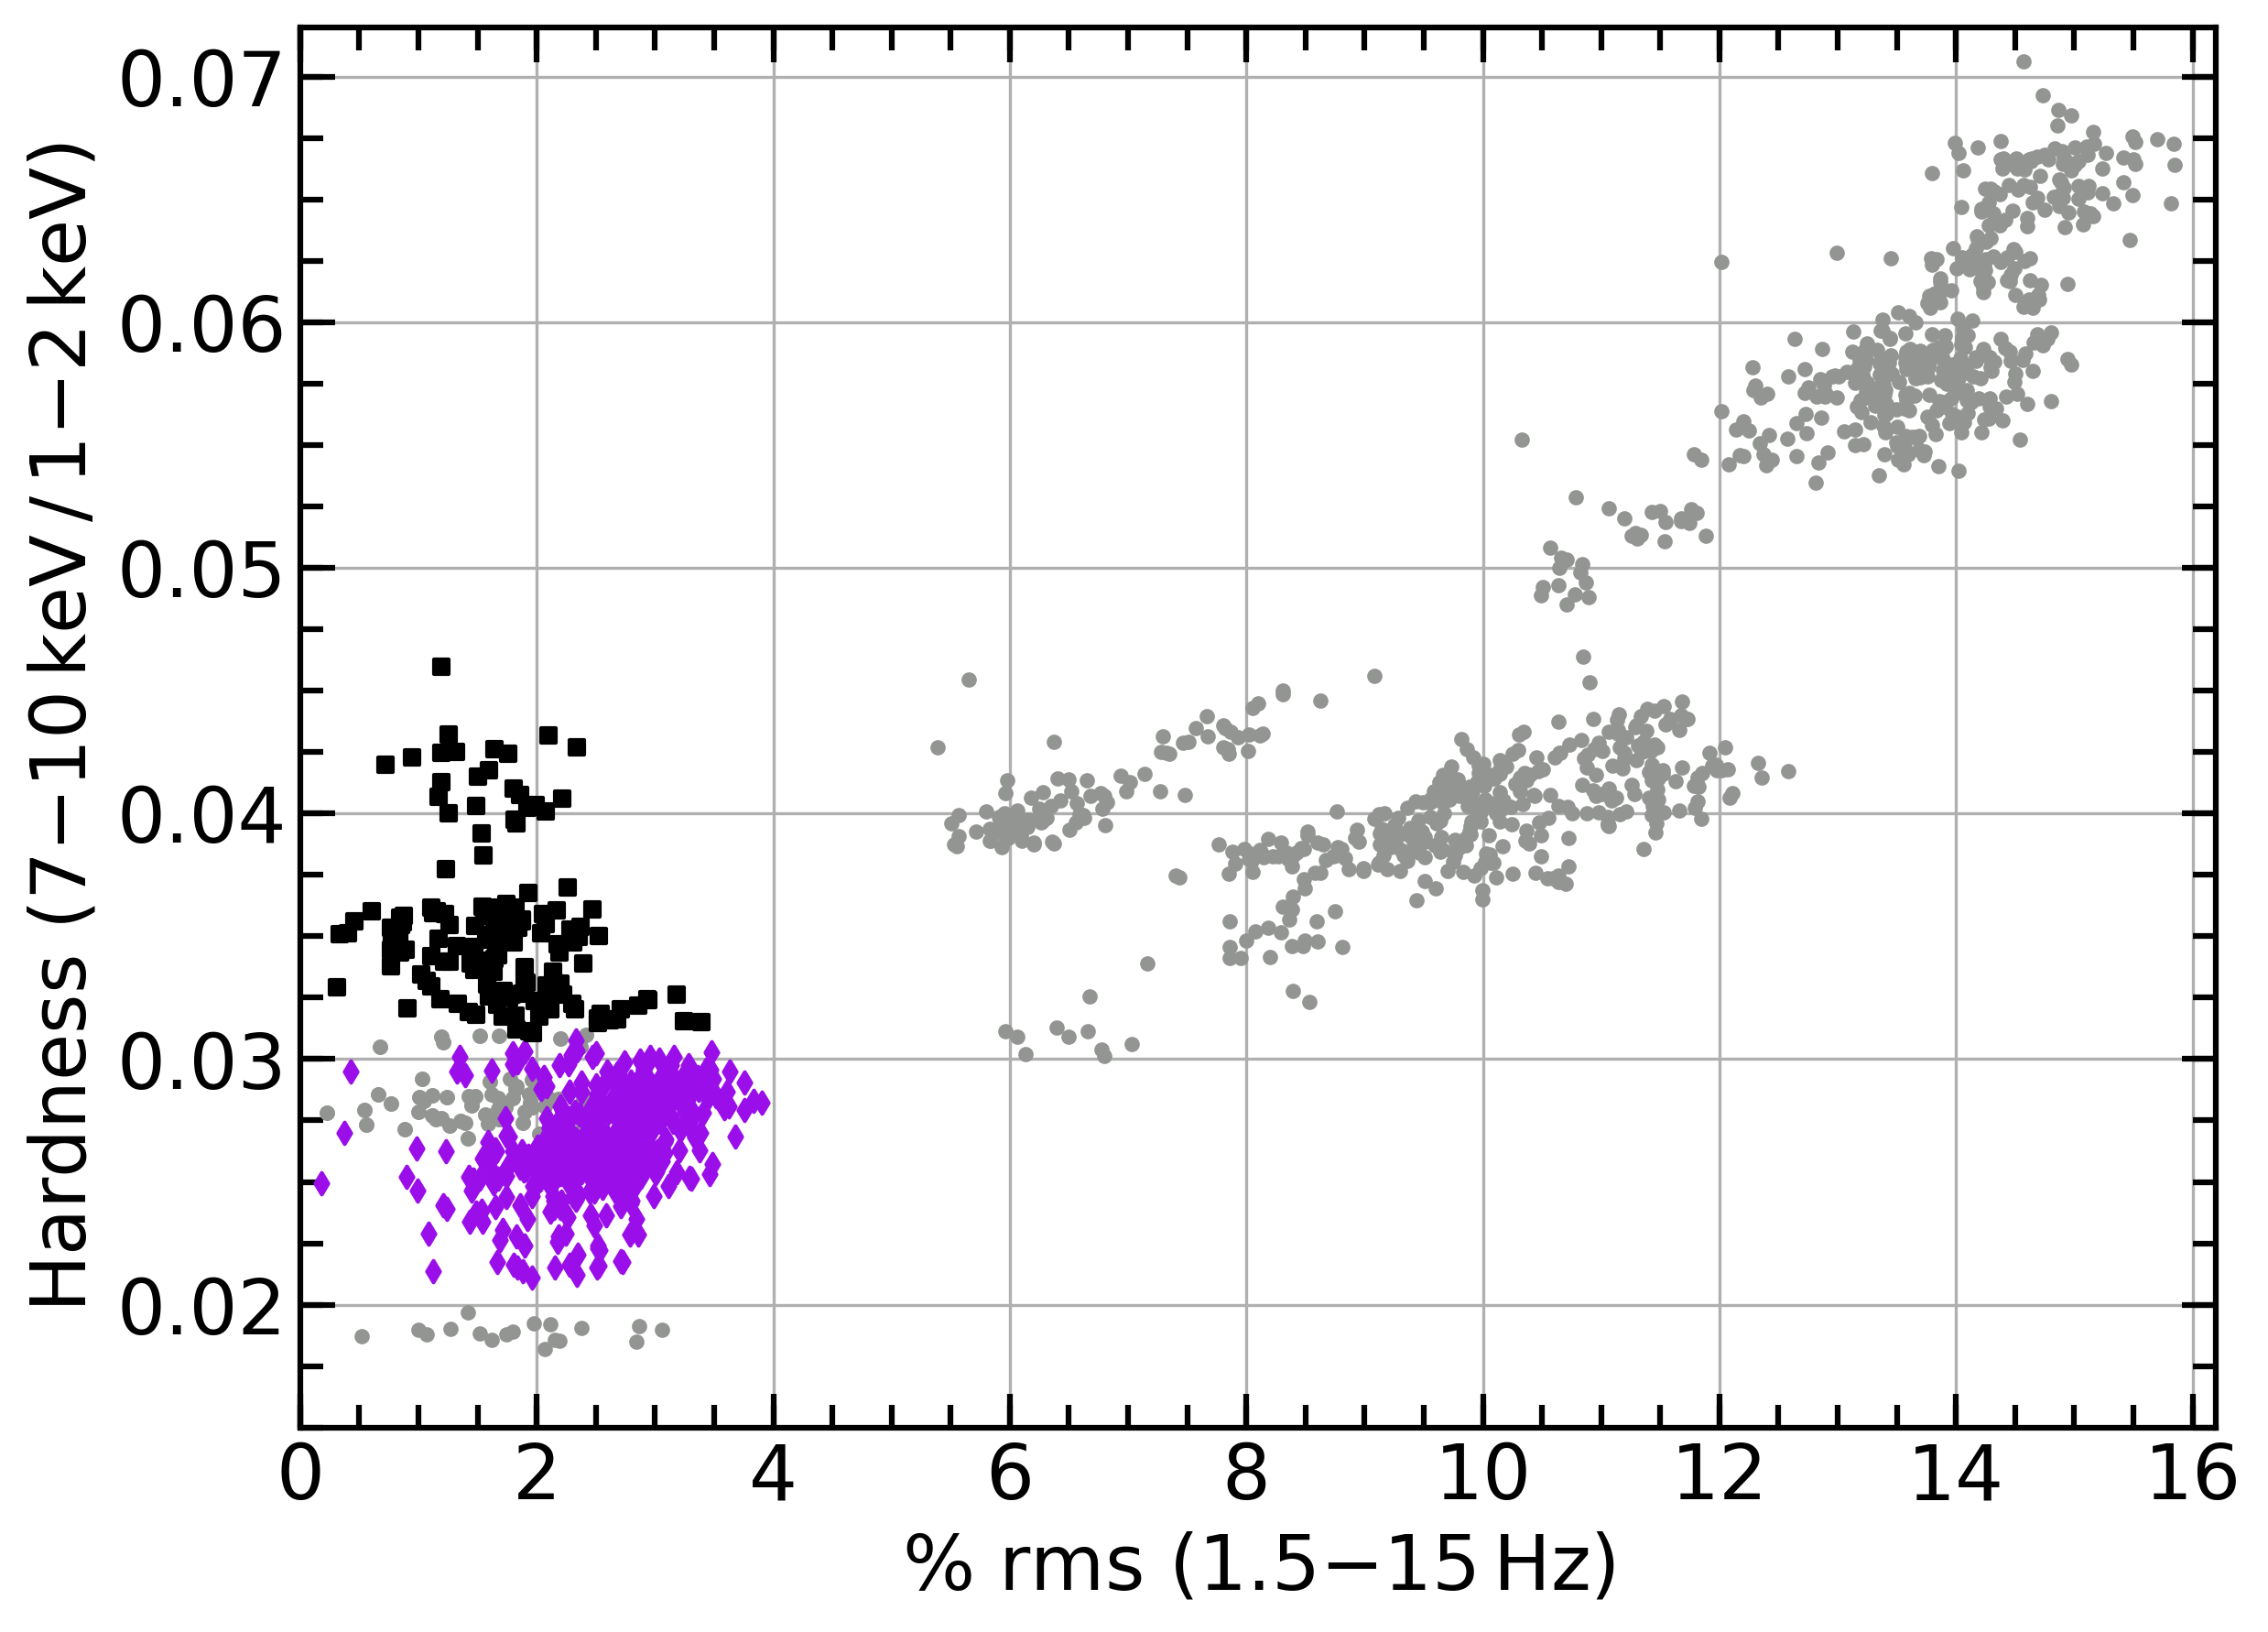

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6.75), dpi=300,)
# ax.scatter(seg_tab['rms']*100, seg_tab['hr'], marker='.', color=xkcdcolor['xkcd:grey'])
ax.scatter(gray_tab['rms']*100, gray_tab['hr'], marker='.', color=xkcdcolor['xkcd:grey'])
ax.scatter(low_segs['rms']*100, low_segs['hr'], marker='.', color=xkcdcolor['xkcd:grey'])
# ax.scatter(low_segs['rms']*100, low_segs['hr'], marker='d', s=16, color=xkcdcolor['xkcd:violet'])
# ax.scatter(low_segs['rms']*100, low_segs['hr'], marker='x', s=17, color=xkcdcolor['xkcd:grey'])
ax.scatter(soft_segs['rms']*100, soft_segs['hr'], marker='d', s=16, color=xkcdcolor['xkcd:violet'])
ax.scatter(hard_segs['rms']*100, hard_segs['hr'], marker='s', s=14, color=xkcdcolor['xkcd:black'])
# ax.scatter(hard_segs['rms']*100, hard_segs['hr'], marker='.', color=xkcdcolor['xkcd:grey'])
# ax.hlines(0.021, 0.0, 0.165, lw=2, color='black', linestyle='--')
# ax.hlines(0.031, 0.0, 0.165, lw=2, color='black', linestyle='--')
# ax.vlines(0.041, 0.015, 0.1, lw=2, color='black', linestyle='-.')
ax.set_xlim(0, 16.2)
ax.set_ylim(0.015, 0.072)
ax.set_xlabel(r"% rms (1.5$-$15$\,$Hz)", fontproperties=font_prop)
ax.set_ylabel(r"Hardness (7$-$10$\,$keV$\,/\,$1$-$2$\,$keV)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax.tick_params(which='major', width=1.5, length=9, direction="in")
ax.tick_params(which='minor', width=1.5, length=6, direction="in")
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.0025))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
ax.set_axisbelow(True)
plt.savefig("./out/rms-hr_dots.eps")
# plt.savefig("./out/rms-hr_justpurple.eps")
plt.show()

In [15]:
## Filtering seg_tab
time_mask = seg_tab['start_time'] <= 119138417.0
filt_tab = seg_tab[time_mask]
# print(filt_tab)
hr_mask = (filt_tab['hr'] < 0.031) & (filt_tab['hr'] > 0.021)
# hr_mask = (filt_tab['hr'] > 0.031) & (filt_tab['hr'] < 0.05)
filt_tab = filt_tab[hr_mask]
# print(filt_tab)
rms_mask = filt_tab['rms'] < 0.05
filt_tab = filt_tab[rms_mask]
# print(filt_tab)

In [16]:
## These ones have the criteria I want from the cell above
good_obsIDs = unique(filt_tab, keys='obsID')['obsID']
print("%d good obsIDs" % len(good_obsIDs))
print(good_obsIDs)

14 good obsIDs
  obsID   
----------
1050360113
1050360114
1050360115
1050360116
1050360117
1050360118
1050360119
1050360120
1130360101
1130360102
1130360109
1130360110
1130360111
1130360112


In [22]:
temp1 = soft_segs['sept_days'][soft_segs['sept_days']>26]
print(temp1[temp1<27])

    sept_days     
------------------
26.252546298600457
  26.2532870393412
26.254027780081937
 26.25476852082268
 26.25550926156342
 26.25625000230416
26.256990743044902
26.257731483785644
26.258472224526383
26.259212965267125
               ...
 26.27315972222222
26.273900462962963
26.274641203703705
26.275381944444444
26.573946759259258
        26.5746875
 26.57542824074074
 26.57616898148148
26.576909722222222
26.577650462962964
26.578391203703703
Length = 33 rows
